
# Stochastic Gradient Descent Regression Model


In [2]:
# Import the necessary modules and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Data Preprocesing


In [3]:
diabetes_data = pd.read_csv('C:/Users/USER/Documents/Engineering/BMEN415/regression_data/diabetes-dataset.csv')
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [4]:
diabetes_data[diabetes_data==0].count()

Pregnancies                  301
Glucose                       13
BloodPressure                 90
SkinThickness                573
Insulin                      956
BMI                           28
DiabetesPedigreeFunction       0
Age                            0
Outcome                     1316
dtype: int64

In [5]:
# Change Insulin null (0) values to mean value
diabetes_data.Insulin = diabetes_data.Insulin.replace(0, diabetes_data.Insulin.mean())

In [6]:
# Change Skin Thickness null (0) values to mean value
diabetes_data.SkinThickness = diabetes_data.SkinThickness.replace(0, diabetes_data.SkinThickness.mean())

In [7]:
# Change Glucose null (0) values to mean value
diabetes_data.Glucose = diabetes_data.Glucose.replace(0, diabetes_data.Glucose.mean())

In [8]:
# Change Skin Blood Pressure (0) values to mean value
diabetes_data.BloodPressure = diabetes_data.BloodPressure.replace(0, diabetes_data.BloodPressure.mean())

In [9]:
# Change BMI null (0) values to mean value
diabetes_data.BMI = diabetes_data.BMI.replace(0, diabetes_data.BMI.mean())

In [10]:
# Updated
diabetes_data[diabetes_data==0].count()

Pregnancies                  301
Glucose                        0
BloodPressure                  0
SkinThickness                  0
Insulin                        0
BMI                            0
DiabetesPedigreeFunction       0
Age                            0
Outcome                     1316
dtype: int64

In [11]:
x = diabetes_data.iloc[:,[0,2,3,4,5,6,7]]
y = diabetes_data.iloc[:,1:2].values

In [12]:
x # Predictors

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,62.0000,35.000,80.254,33.6,0.127,47
1,0,82.0000,31.000,125.000,38.2,0.233,23
2,0,69.1455,20.935,80.254,44.2,0.630,31
3,0,68.0000,42.000,250.000,42.3,0.365,24
4,1,62.0000,41.000,480.000,40.7,0.536,21
...,...,...,...,...,...,...,...
1995,2,64.0000,24.000,55.000,29.7,0.370,33
1996,8,72.0000,42.000,130.000,32.7,0.719,36
1997,6,78.0000,20.935,80.254,31.2,0.382,42
1998,0,110.0000,46.000,130.000,67.1,0.319,26


In [13]:
y # Outcome - Glucose Levels

array([[138.],
       [ 84.],
       [145.],
       ...,
       [ 85.],
       [129.],
       [ 81.]])

In [14]:
diabetes_data.info() # summary of data and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   float64
 2   BloodPressure             2000 non-null   float64
 3   SkinThickness             2000 non-null   float64
 4   Insulin                   2000 non-null   float64
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 140.8 KB


In [15]:
diabetes_data.describe() # description of the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.970186,72.257047,26.932877,118.615412,32.643702,0.470930,33.090500,0.342000
std,3.306063,30.533180,11.968614,9.884003,88.366170,7.190337,0.323553,11.786423,0.474498
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.935000,80.254000,27.600000,0.244000,24.000000,0.000000
50%,3.000000,118.000000,72.000000,23.000000,80.254000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [16]:
diabetes_data.corr() # correlation of the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.121569,0.199471,0.028116,-0.020319,0.011439,-0.025453,0.539457,0.224437
Glucose,0.121569,1.000000,0.200509,0.175337,0.384706,0.233228,0.124176,0.259853,0.487977
BloodPressure,0.199471,0.200509,1.000000,0.154736,0.012714,0.259445,0.015216,0.325490,0.171844
SkinThickness,0.028116,0.175337,0.154736,1.000000,0.257060,0.520245,0.143700,0.035946,0.170856
Insulin,-0.020319,0.384706,0.012714,0.257060,1.000000,0.217047,0.161557,-0.009007,0.171339
BMI,0.011439,0.233228,0.259445,0.520245,0.217047,1.000000,0.142019,0.018815,0.282615
DiabetesPedigreeFunction,-0.025453,0.124176,0.015216,0.143700,0.161557,0.142019,1.000000,0.026569,0.155459
Age,0.539457,0.259853,0.325490,0.035946,-0.009007,0.018815,0.026569,1.000000,0.236509
Outcome,0.224437,0.487977,0.171844,0.170856,0.171339,0.282615,0.155459,0.236509,1.000000


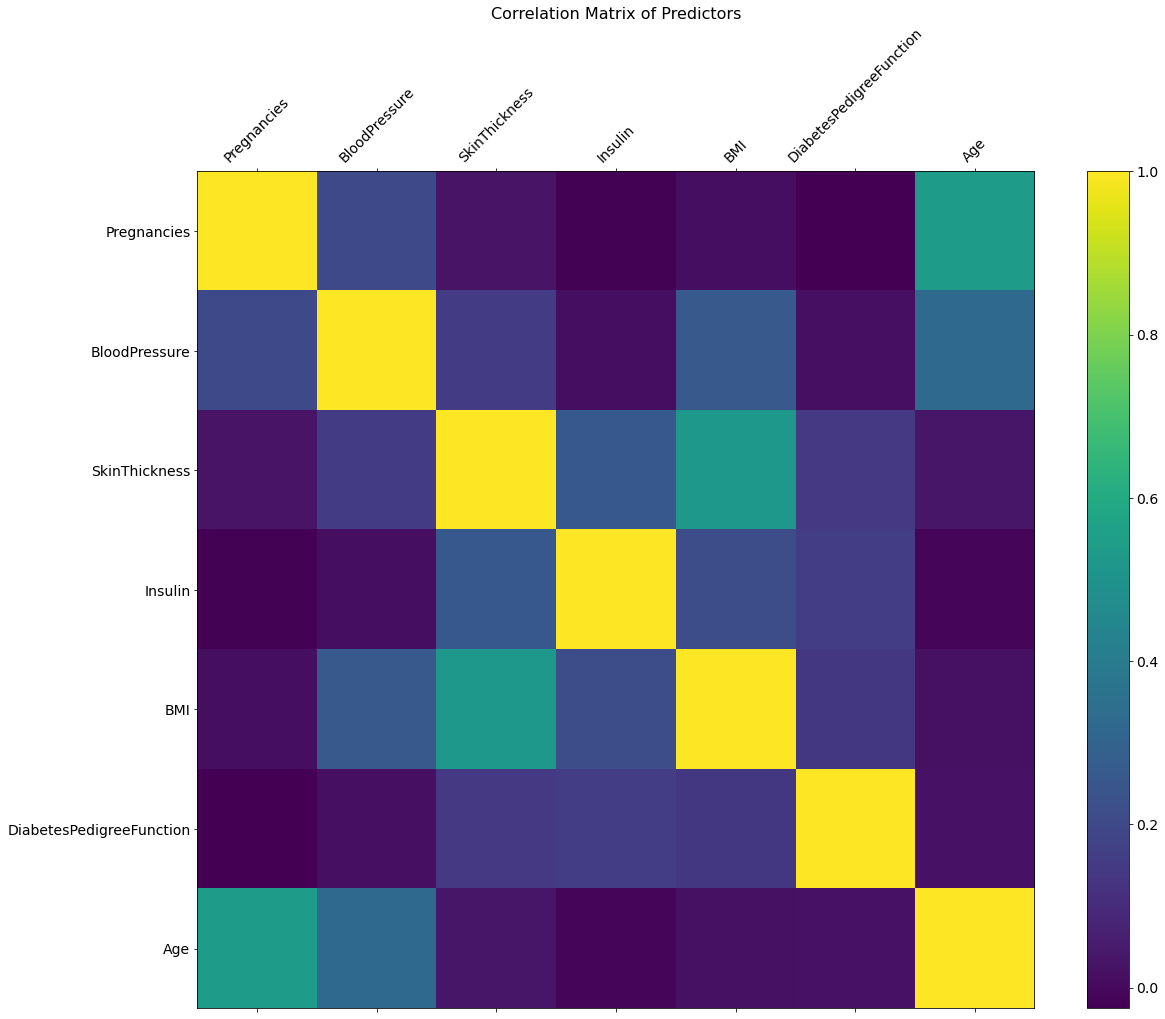

In [17]:
# Correlation Matrix of Predictors
correlation = plt.figure(figsize=(19, 15))
plt.matshow(x.corr(), fignum=correlation.number)
plt.xticks(range(x.select_dtypes(['number']).shape[1]), x.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(x.select_dtypes(['number']).shape[1]), x.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix of Predictors', fontsize=16);

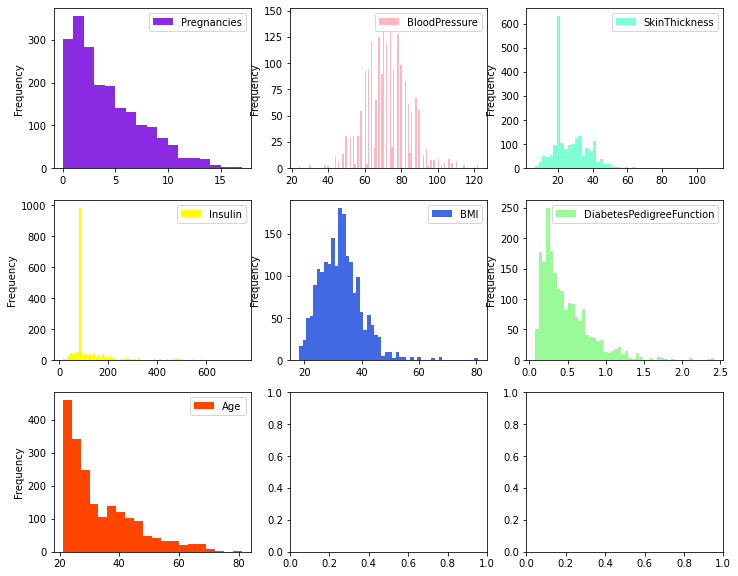

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

x.plot(kind="hist", y="Pregnancies", bins = 17, color="blueviolet", ax=axes[0][0])
x.plot(kind="hist", y="BloodPressure", bins = 120, color="lightpink", ax=axes[0][1])
x.plot(kind="hist", y="SkinThickness", bins=50, color="aquamarine", ax=axes[0][2])
x.plot(kind="hist", y="Insulin", bins=100, color="yellow", ax=axes[1][0])
x.plot(kind="hist", y="BMI", bins=50, color="royalblue", ax=axes[1][1])
x.plot(kind="hist", y="DiabetesPedigreeFunction", bins=50, color="palegreen", ax=axes[1][2])
x.plot(kind="hist", y="Age", bins=20, color="orangered", ax=axes[2][0])
plt.show()


## Training the Data


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=1/3,random_state=0) 
# splits data, 1/3 of data for testing, 2/3 of data for training

In [20]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regressor = make_pipeline(StandardScaler(), SGDRegressor())

regressor.fit(x_train, y_train.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])


## Testing the Model


In [21]:
# Predict glucose from test data
y_pred = regressor.predict(x_test)

In [22]:
# Predicted Value
y_pred

array([124.98459375, 115.83847964, 114.31648309, 110.83862928,
       137.56471076, 125.94967523, 107.06191445, 112.36479916,
       119.53607503, 108.49721547, 103.04478325, 124.61753352,
       112.02427417, 120.59220433, 125.94967523, 100.28429969,
       131.59499165, 128.1736119 , 136.55784426, 135.03669071,
       136.08411348, 128.74196085, 113.91544185, 115.66943872,
       108.47106479, 137.91787957, 131.98639812, 136.73558693,
       116.83231534, 117.57128013, 144.95766106, 125.51865714,
       110.5302279 , 147.12628356, 107.12523712, 130.0055283 ,
       122.98788105, 105.35738689, 124.89717942, 132.74054235,
       129.54542634, 113.9912433 , 113.07581223, 133.70226071,
       135.27476673, 157.43354353, 129.40880629, 116.57412306,
       134.26940982, 109.79462142, 113.15528441, 117.06275112,
       122.53186183, 128.71487786, 131.83615599, 104.73997866,
       128.31983196, 129.85098081, 107.12700639, 112.35649345,
       110.72674153, 115.83964534, 115.89725175, 119.45

In [23]:
y_pred.size

667

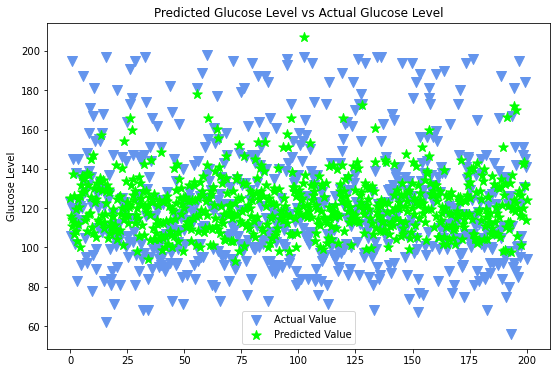

In [24]:
x_ax = np.linspace(0,200, num=667)
s = 100

plt.rcParams["figure.figsize"] = (9, 6)
plt.scatter(x_ax, y_test, s, color='cornflowerblue', label=f'Actual Value', marker='v')
plt.scatter(x_ax, y_pred, s, color='lime', label=f'Predicted Value', marker='*')

plt.title('Predicted Glucose Level vs Actual Glucose Level')
plt.legend()
plt.ylabel('Glucose Level')
plt.show()

# Add Density Plot

In [25]:
from sklearn import metrics

In [26]:
# Mean Absolute Error
print(metrics.mean_absolute_error(y_test, y_pred))

19.786536398647986


In [27]:
# Mean Squared Error
print(metrics.mean_squared_error(y_test, y_pred))

660.7391635721266


In [28]:
# Square Root of Mean Squared Error
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

25.704847083227836


In [29]:
# R^2 Error
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.259914357616741